# Import data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('../data/application_record.csv')
df.drop_duplicates(subset=['ID'], inplace=True)

record = pd.read_csv('../data/credit_record.csv')

In [9]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [10]:
df['ID'].nunique(), record['ID'].nunique()

(438510, 45985)

In [11]:
df.shape, record.shape

((438510, 18), (1048575, 3))

# Visualization

* Our data has duplicate rows.

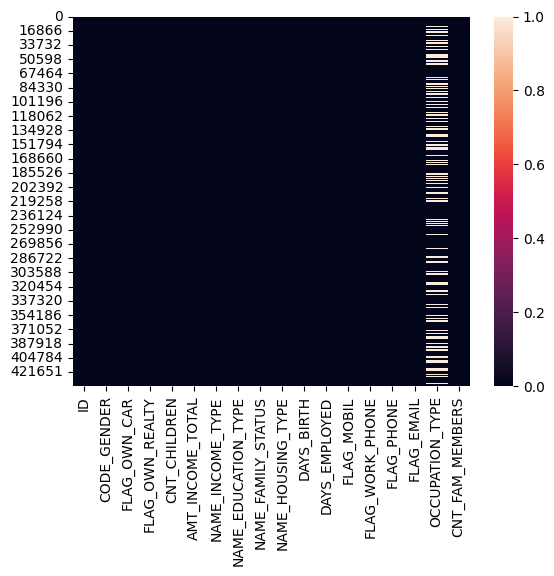

In [12]:
sns.heatmap(df.isna());

* We only have missing values in OCCUPATION_TYPE

In [13]:
sum(record.isna().sum())

0

**Number of children**

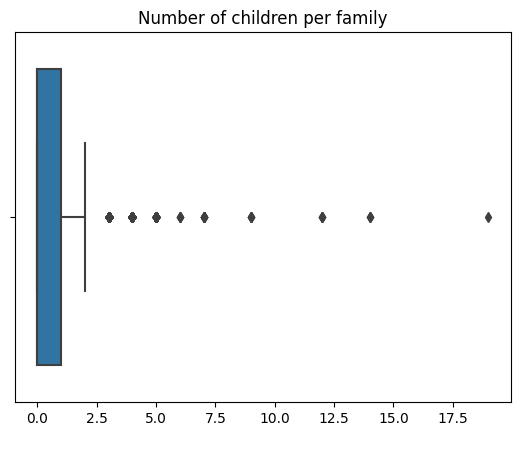

In [14]:
sns.boxplot(x = df.CNT_CHILDREN)
plt.xlabel(' ')
plt.title('Number of children per family');

**Family size**

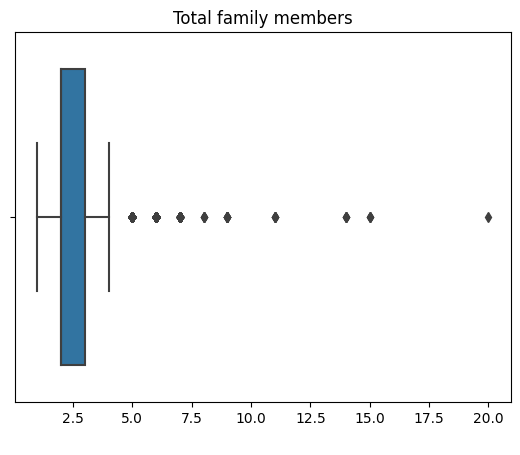

In [15]:
sns.boxplot(x = df.CNT_FAM_MEMBERS)
plt.xlabel(' ')
plt.title('Total family members');

**Annual income**

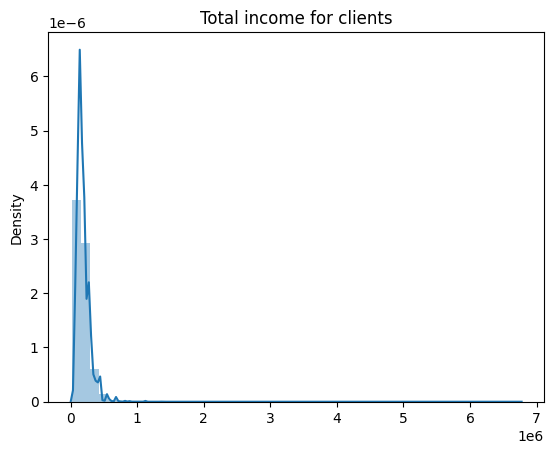

In [16]:
sns.distplot(df.AMT_INCOME_TOTAL)
plt.xlabel(' ')
plt.title('Total income for clients');

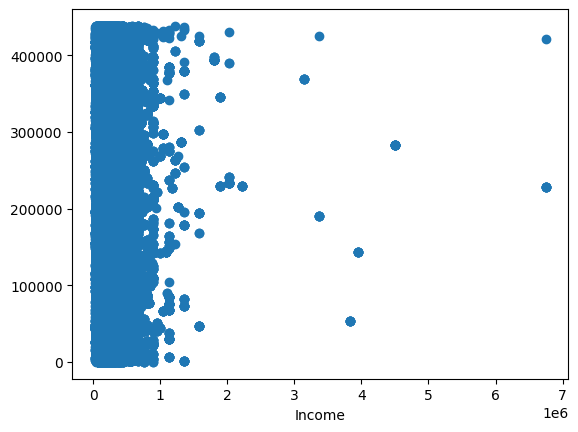

In [17]:
plt.scatter(df.AMT_INCOME_TOTAL, range(len(df.AMT_INCOME_TOTAL)))
plt.xlabel('Income');

**Clients Gender**

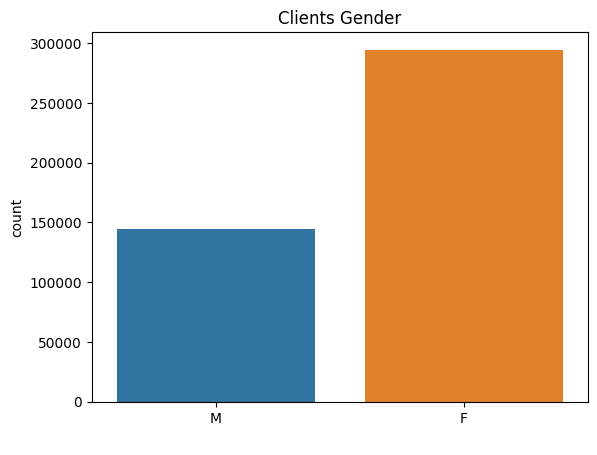

In [18]:
sns.countplot(x = df.CODE_GENDER, data=df)
plt.xlabel(' ')
plt.title('Clients Gender');

**Is a client has a car?**

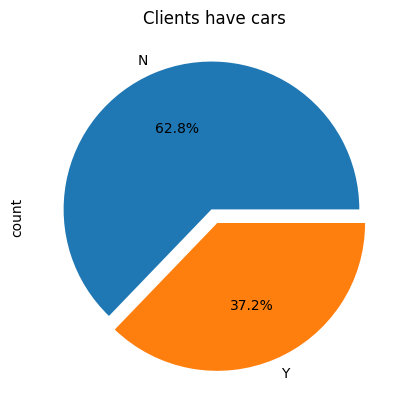

In [19]:
df.FLAG_OWN_CAR.value_counts().plot(kind='pie',
                                    explode = [0.05,0.05],
                                    title = 'Clients have cars',
                                    autopct = '%1.1f%%');

**Is a client has a proprety?**

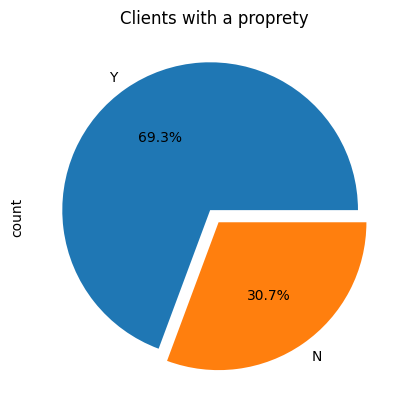

In [20]:
df.FLAG_OWN_REALTY.value_counts().plot(kind='pie', 
                                       explode = [0.05,0.05],
                                       title='Clients with a proprety', 
                                       autopct='%1.1f%%');

**Clients income type**

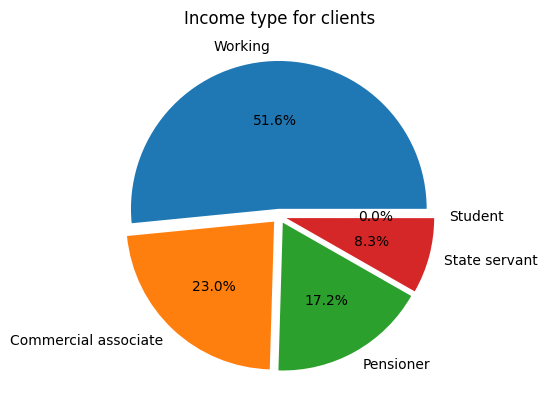

In [21]:
df.NAME_INCOME_TYPE.value_counts().plot(kind = 'pie',
                                        explode = [0.05,0.05,0.05,0.05,0.05],
                                        title = 'Income type for clients',
                                        autopct = '%1.1f%%')
plt.ylabel('')
plt.show();

**Education**

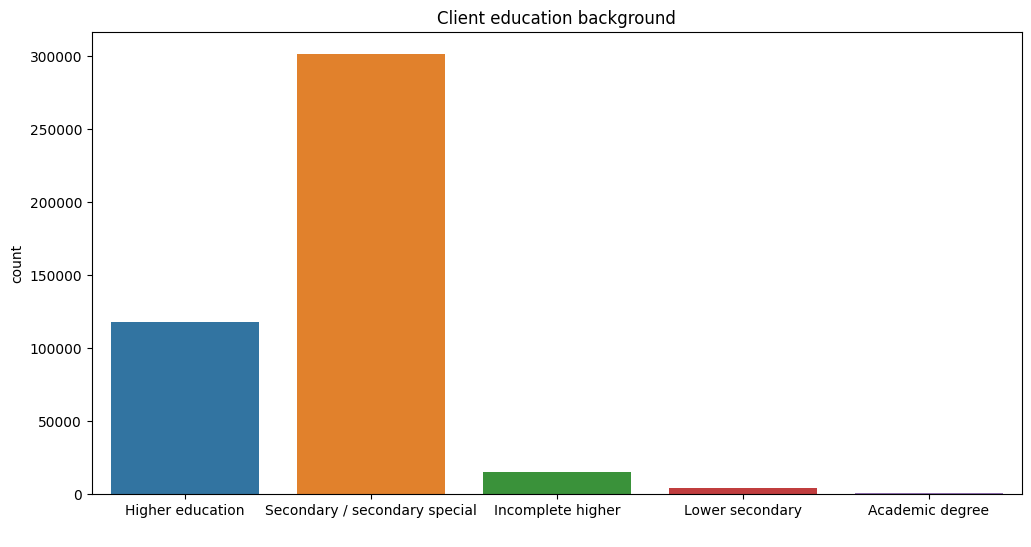

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x = df.NAME_EDUCATION_TYPE, data = df)
plt.title('Client education background')
plt.xlabel(' ')
plt.show();

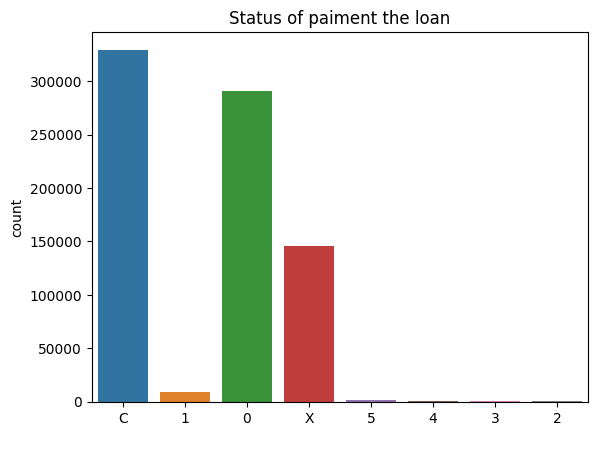

In [23]:
data = df.merge(record, how='inner', on=['ID'])
sns.countplot(x=data.STATUS, data=data)
plt.xlabel(' ')
plt.title('Status of paiment the loan');

**STATUS**
* 0: 1-29 days past due 
* 1: 30-59 days past due 
* 2: 60-89 days overdue 
* 3: 90-119 days overdue 
* 4: 120-149 days overdue 
* 5: Overdue or bad debts, write-offs for more than 150 days 
* C: paid off that month 
* X: No loan for the month